# TD4 - Boule de stabilisation de Taipei 101

In [1]:
%matplotlib inline

import numpy as np
from scipy import linalg as la
import matplotlib.pyplot as plt

## Description du problème

Il s'agit ici de modéliser le système d'amortissement des vibrations présent en haut du gratte-ciel Taipei 101 à Taiwan. Un pendule géant aux propriétés bien choisies permet de réduire les phénomènes de résonance de l'édifice.

Le système à modéliser est le dispositif expérimental suivant, modèle réduit du dispositif réel : [Edd China explores: Vibration-damping technology by Sandvik Coromant](https://youtu.be/VCxm3vTWgvU?si=BRcAmpYJal1IHqOW&t=515).


### Données du problème

Considérons les données quantitatives suivantes :

| $L_{\mathrm{tour}}$     | $h$      | $b$      | $E$       | $m_{\mathrm{tour}}$ | $L_{\mathrm{pendule}}$ | $m_{\mathrm{pendule}}$ | $c_{\mathrm{pendule}}$ |
|:-------:|:--------:|:--------:|:---------:|:--------:|:--------:|:--------:|:--------:|
| $\mathrm{1.5\,m}$| $\mathrm{5\,mm}$ | $\mathrm{0.1\,m}$ | $\mathrm{210\,GPa}$ | $\mathrm{20\,kg}$ | ? | $\mathrm{2\,kg}$ | ? |

La longueur du pendule ainsi que le taux d'amortissement restent à déterminer. 

## Paramétrage de base

La tour (du modèle réduit) peut être modélisée comme une masse principale supportée par deux colonnes, faites à partir de deux plaques métalliques. Il semble pertinent de modéliser cette tour de façon similaire à ce qui avait été fait sur le chateau d'eau. Pour le pendule, le paramétrage est classique : une masse ponctuelle située à une certaine distance d'un axe de rotation.

![](pictures/TD4-parametrage.png)

Le paramètre $u_1(t)$ permet de suivre le mouvement horizontal de la masse principale $m_1$ et le paramètre $\theta_2(t)$ permet de suivre le mouvement rotatif du pendule.

## Système masse-ressort équivalent

### Pendule

Il est possible d'approcher le pendule comme un système masse-ressort, sous l'hypothèse de petits mouvements :

![Système masse-ressort équivalent](pictures/TD4-penduleEqSyst.png)

La masse du système masse-ressort équivalent est égale à la masse du pendule. L'obtention de la raideur équivalente peut être identifiée à partir de l'équation du mouvement du pendule. 

Il y a différentes manières d'obtenir cette équation. Rappelons les expressions de la vitesse et de l'acceleration au centre de masse noté ici $P$ :
$$
\begin{split}
    \vec{V}(P/\mathcal{R}_0)
    &= 
    \bigg(\frac{d}{dt}\vec{OP}(t)\bigg)_{\mathcal{R}_0} \\
    &=
    \bigg(\frac{d}{dt}\vec{OP}(t)\bigg)_{\mathcal{R}_p}
    +
    \vec{\Omega}(\mathcal{R}_p/\mathcal{R}_0)\wedge\vec{OP}(t) \\
    &=
    \vec{0} + \dot{\theta}_p(t)\vec{z}_0 \wedge (-L_p \vec{y}_p) \\
    &= 
    L_p\dot{\theta}_p(t)\vec{x}_p, 
    \\[5pt]
    \vec{A}(P/\mathcal{R}_0)
    &= 
    \bigg(\frac{d}{dt}\vec{V}(P/\mathcal{R}_0)\bigg)_{\mathcal{R}_0} \\
    &= 
    \bigg(\frac{d}{dt}\vec{V}(P/\mathcal{R}_0)\bigg)_{\mathcal{R}_p}
    +
    \vec{\Omega}(\mathcal{R}_p/\mathcal{R}_0)\wedge\vec{V}(P/\mathcal{R}_0) \\
    &=
    L_p\ddot{\theta}_p(t)\vec{x}_p
    +
    \dot{\theta}_p(t)\vec{z}_0 \wedge (L_p\dot{\theta}_p(t)\vec{x}_p) \\
    &=
    L_p\ddot{\theta}_p(t)\vec{x}_p
    +
    L_p\dot{\theta}_p^2(t)\vec{z}_0 \wedge \vec{x}_p \\
    &=
    L_p\ddot{\theta}_p(t)\vec{x}_p
    +
    L_p\dot{\theta}_p^2(t)\vec{y}_p.
\end{split}
$$
Nous avons utilisé ici la [formule de Bour](https://fr.wikipedia.org/wiki/Composition_des_mouvements). Considérons l'ensemble masse du pendule et le fil/cable comme un solide indéformable que nous appelons pendule. Les actions mécaniques s'appliquant sur le pendule sont :

* l'action de la pesanteur,
* l'action du bâti. 
  
Ecrivons l'expression de ces actions mécaniques sous forme de torseur des actions mécaniques :
$$
\begin{split}
\mathcal{F}(\mathrm{pesanteur}\to\mathrm{pendule})
&=
\begin{array}{r}%
    \vphantom{\vec{F}}%
    \cr%
    \vphantom{\vec{F}}P%
    \end{array}%
    \!\!\!%
    \left\lbrace%
    \!\!%
    \begin{array}{l}%
    -m g \vec{y}_{0}%
    \cr%
    \vec{0}\\%
    \end{array}%
    \right.%
    ,
\\[10pt]
\mathcal{F}(\mathrm{bâti}\to\mathrm{pendule})
&=
\begin{array}{r}%
    \vphantom{\vec{F}}%
    \cr%
    \vphantom{\vec{F}}O%
    \end{array}%
    \!\!\!%
    \left\lbrace%
    \!\!%
    \begin{array}{l}%
    \vec{F}(\mathrm{bâti}\to\mathrm{pendule})%
    \cr%
    \vec{0}\\%
    \end{array}%
    \right.%
    .
\end{split}
$$
Remarque importante : ici ces deux torseurs sont exprimés en deux points différents ($P$ et $O$). La résultante $\vec{F}(\mathrm{bâti}\to\mathrm{pendule})$ contient deux inconnues définissant les efforts de réaction. Pour obtenir l'équation du mouvement du pendule, nous allons utiliser l'équation issue de l'équilibre dynamique des moments au point $O$ (PFD, eq. moment en $O$ suivant $\vec{z}_0$).
Pour cela, écrivons les moments des actions mécaniques en ce point $O$. Pour l'action du bâti, il n'y a rien à faire, nous connaissons son expression (déjà présenté dans le torseur car il avait été exprimé au point $O$ directement) :
$$
\vec{M}(O, \mathrm{bâti}\to\mathrm{pendule})
=
\vec{0}.
$$
Pour l'action de la pesanteur, il s'agit d'appliquer la formule de transport des moments ("BABAR") :
$$
\vec{M}(O, \mathrm{pesanteur}\to\mathrm{pendule})
=
\vec{M}(P, \mathrm{pesanteur}\to\mathrm{pendule})
+
\vec{OP}\wedge
\vec{F}(\mathrm{pesanteur}\to\mathrm{pendule}),
$$
où la résultante est $\vec{F}(\mathrm{pesanteur}\to\mathrm{pendule}) = -m g \vec{y}_{0}$. Nous trouvons :
$$
\vec{M}(O, \mathrm{pesanteur}\to\mathrm{pendule})
=
\vec{0} + (-L_p \vec{y}_{p})\wedge(-m g \vec{y}_{0})
=
-m g L_p \sin{\theta_p(t)}\vec{z}_0.
$$

L'équation du moment dynamique appliqué au pendule et au point $O$ s'écrit :
$$
\boxed{
\vec{\delta}(O,\mathrm{pendule}/\mathcal{R}_0)
=
\vec{M}(O, \mathrm{pesanteur}\to\mathrm{pendule})
+
\vec{M}(O, \mathrm{bâti}\to\mathrm{pendule}).
}
$$
Il nous reste à déterminer l'expression du moment dynamique exprimé au point $O$. Nous avons :
$$
\vec{\delta}(O,\mathrm{pendule}/\mathcal{R}_0)
=
\vec{\delta}(P,\mathrm{pendule}/\mathcal{R}_0)
+
\vec{OP}(t)\wedge\vec{D}(\mathrm{pendule}/\mathcal{R}_0),
$$
où la résultante dynamique $\vec{D}(\mathrm{pendule}/\mathcal{R}_0)$ est égale à :
$$
\vec{D}(\mathrm{pendule}/\mathcal{R}_0)
= 
m \vec{A}(P/\mathcal{R}_0)
=
m L_p\ddot{\theta}_p(t)\vec{x}_p
+
m L_p\dot{\theta}_p^2(t)\vec{y}_p.
$$
Le moment dynamique au centre de masse $P$ est nul car nous considérons le pendule comme une masse ponctuelle (tenseur d'inertie et moment cinétique nuls). Ainsi :
$$
\begin{split}
\vec{\delta}(O,\mathrm{pendule}/\mathcal{R}_0)
&=
\vec{0}
+
(-L_p\vec{y}_p)\wedge(m L_p\ddot{\theta}_p(t)\vec{x}_p
+
m L_p\dot{\theta}_p^2(t)\vec{y}_p)
\\
&=
m L_p^2\ddot{\theta}_p(t)\vec{z}_0.
\end{split}
$$
Ainsi, l'équation des moments du principe fondamental de la dynamique appliqué au pendule au point $O$ donne :
$$
\boxed{
    m L_p^2\ddot{\theta}_p(t) = -m g L_p \sin{\theta_p(t)}, \forall{t}.
}
$$

L'hypothèse de petites rotations permet d'écrire :
$$
    u_p(t) = L_p \sin{\theta_p(t)} \approx L_p{\theta_p(t)},
    \quad\mathrm{et}\quad
    \ddot{u}_p(t) \approx L_p{\ddot{\theta}_p(t)}.
$$
En combinant ces relations avec l'équation du mouvement précédente, nous déduisons :
$$
m L_p \ddot{u}_p(t) + m g u_p(t) = 0, \forall{t}.
$$
L'équation obtenue s'apparente à l'équation dd mouvement d'un système masse-ressort :
$$
\boxed{
m \ddot{u}_p(t) + k_{\mathrm{eq}} u_p(t) = 0, \forall{t},
}
$$
où la raideur équivalente est donnée par :
$$
\boxed{
    k_{\mathrm{eq}} = \frac{mg}{L_{\mathrm{p}}}.
}
$$

Un résultat intéressant à noter est que la pulsation propre d'un tel système ne dépend pas de la masse :
$$
\omega_0 = \sqrt{\frac{k_{\mathrm{eq}}}{m}} = \sqrt{\frac{g}{L_p}}.
$$
Rappelons également que ce résultat peut être obtenu par d'autres approches (mécanique du point, théorème énergétique), voir [page Wikipedia](https://fr.wikipedia.org/wiki/Pendule_simple) par exemple.

### La tour

Comme évoqué, la tour peut être modélisée de la même manière que ce qui avait été fait sur le chateau d'eau : une masse ponctuelle se déplaçant horizontalement et supportée par deux colonnes. Ce système peut être abordé comme un système masse-ressort :

![Système masse-ressort équivalent de la tour](pictures/TD4-tourEqSyst.png)

La raideur équivalente à la présence des deux colonnes peut être déterminée à partir d'un calcul de "résistance des matériaux" (cf. TD du chateau d'eau). 
$$
\boxed{
k_{\mathrm{tour}} = \frac{24 EI}{L_{\mathrm{tour}}^3},
\quad
I = \frac{bh^3}{12}.
}
$$

### Système global

Le système global peut donc être modélisé comme un système masse-ressort à 2 DDL :

![Système équivalent masse-ressort à 2 DDL](pictures/TD4-MasseRessortEqSyst.png)

L'ajout d'un amortissement visqueux permet de modéliser le fait que la masse du pendule est immergée dans un bain d'un liquide visqueux (et sur la tour Tapei 101, que le pendule est reliée à des vérins hydrauliques jouant un rôle similaire d'amortissement et de dissipation d'énergie).

Résumons les raideurs équivalentes :
$$
k_1 = \frac{24 EI}{L_1^3},
~~I = \frac{bh^3}{12},
\quad
k_2 = \frac{m_2 g}{L_2}. 
$$
Le coefficient d'amortissement est classiquement défini à partir d'un taux d'amortissement :
$$
c_2 = 2\zeta\sqrt{m_2 k_2}.
$$
Nous pouvons également définir les pulsations caractéristiques comme :
$$
\omega_1 = \sqrt{\frac{k_1}{m_1}},
\quad
\omega_2 = \sqrt{\frac{k_2}{m_2}}.
$$
Remarque : ce ne sont pas les pulsations propres des modes de vibrations.

In [2]:
# Principal structure
m1 = 20 # [kg] principal mass 
E  = 210E+9 # [Pa] Young's Modulus of the pillars
L1= 1.5 # [m] Length of the pillars 
h = 0.005  # [m] Thickness
b = 0.10 # [m] Width
I = b*h**3/12.0 # [m^4] Second moment of area 

k1 = 24*E*I/L1**3
w1 = np.sqrt(k1/m1) # [rad/s]
print("Pulsation caractéristique w1 : {0:.2f} rad/s".format(w1))

Pulsation caractéristique w1 : 8.82 rad/s


In [3]:
# Pendulum
g = 10 # [m/s-2] Gravitational constant
m2 = 2 # [kg] Mass of the pendulum
L2 = 0.1 # [m] Length of the pendulum (PARAMETER)
k2 = m2*g/L2 # [N/m] Equivalent stiffness of the pendulum
w2 = np.sqrt(k2/m2)
print("Pulsation caractéristique w2 : {0:.2f} rad/s".format(w2))

zeta = 0.1 # Damping ratio (PARAMETER)
c2 = 2*zeta*np.sqrt(k2*m2) # Damping coefficient

print("Length of the pendulum: {0:.3} m".format(L2))
print("Damping ratio: {0:.3}".format(zeta))

Pulsation caractéristique w2 : 10.00 rad/s
Length of the pendulum: 0.1 m
Damping ratio: 0.1


## Equations du mouvement

L'obtention des équations du mouvement se fait en étudiant l'équilibre dynamique du système masse-ressort à 2 DDL. En appliquant le principe fondamental de la dynamique aux deux masses donne assez directement les deux équations du mouvement suivantes :
$$
\left\{
\begin{array}{l}
    m_1 \ddot{u}_1(t) = -k_1(u_1(t) - u_{\mathrm{gr}}(t)) - c_2(\dot{u}_1(t) - \dot{u}_2(t)) - k_2(u_1(t) - u_2(t)),
    \\[5pt]
    m_2 \ddot{u}_2(t) = -c_2(\dot{u}_2(t) - \dot{u}_1(t)) - k_2(u_2(t) - u_1(t)). 
\end{array}    
\right.
$$
Ces deux équations peuvent être réorganisées et écrites sous forme matricielle :
$$
\boxed{
\mathbf{M}\ddot{\boldsymbol{u}}(t)
+
\mathbf{C}\dot{\boldsymbol{u}}(t)
+
\mathbf{K}{\boldsymbol{u}}(t)
=
\boldsymbol{f}(t),
}
$$
où le vecteur $\boldsymbol{u}(t)$ contient les deux déplacements $u_1(t)$ et $u_2(t)$, et où les matrices de masse, d'amortissement, et de rigidité sont données par :
$$
\mathbf{M}
=
\begin{bmatrix}
m_1 & \\
& m_2
\end{bmatrix},
\quad
\mathbf{C}
=
\begin{bmatrix}
c_2 & -c_2 \\
-c_2& c_2
\end{bmatrix},
\quad
\mathbf{K}
=
\begin{bmatrix}
k_1 + k_2 & -k_2 \\
-k_2& k_2
\end{bmatrix}.
$$
Finalement, le second membre dans le système d'équations s'exprime ainsi :
$$
\boldsymbol{f}(t)
=
\begin{pmatrix}
   k_1 u_{\mathrm{gr}}(t)  \\ 0
\end{pmatrix}
=
\mathbf{f}\cos(\omega{}t),
\quad
\mathbf{f}
 = 
\begin{pmatrix}
   k_1 U_{\mathrm{gr}}  \\ 0
\end{pmatrix}.
$$

In [4]:
Ugr = 0.01
M = np.array(
    [[m1, 0],
     [0, m2]])
C = np.array(
    [[c2, -c2],
     [-c2,  c2]])
K = np.array(
    [[k1+k2, -k2],
     [  -k2,  k2]])
F = np.array((k1*Ugr, 0))

## Amplification dynamique

Nous souhaitons étudier l'influence du pendule sur le comportement vibratoire de la tour. En pratique, cela signifie que nous souhaitons investiguer les amplitudes des vibrations de l'édifice sur une plage de pulsation d'excitation.

Pour cela, il s'agit de résoudre le problème d'oscillation forcée précédent. Nous cherchons une solution de la forme suivante :
$$
\boxed{
\boldsymbol{u}(t) = \mathfrak{R}\big(\boldsymbol{u}_{\mathbb{C}}(t)\big),
\quad
\boldsymbol{u}_{\mathbb{C}}(t)
=
\begin{pmatrix}
    \mathcal{U}_1 \\
    \mathcal{U}_2 \\
\end{pmatrix}\mathbf{e}^{\mathrm{i}\omega{}t},
}
$$
ou $\mathcal{U}_1\in\mathbb{C}$ et $\mathcal{U}_2\in\mathbb{C}$ sont les amplitudes complexes. Précisément, nous cherchons à éviter les phénomènes de résonance de la tour, c'est-à-dire que nous souhaitons que l'amplitude complexe $\mathcal{U}_1$ prenne des valeurs contenues et idéalement les plus petites possibles :

* $|\mathcal{U}_1|/U_{\mathrm{gr}} \ll 1 \Rightarrow$ la tour n'oscille quasiment pas,
* $|\mathcal{U}_1|/U_{\mathrm{gr}} \:<1 \Rightarrow$ les oscillations de la tour sont plus faibles que celles du sol,
* $|\mathcal{U}_1|/U_{\mathrm{gr}} \:\approx 1 \Rightarrow$ les oscillations de la tour sont similaires à celles du sol,
* $|\mathcal{U}_1|/U_{\mathrm{gr}} \:> 1 \Rightarrow$ les oscillations de la tour sont plus grandes que celles du sol,
* $|\mathcal{U}_1|/U_{\mathrm{gr}} \gg 1 \Rightarrow$ la tour oscille fortement.

### Résolution

Nous substituons la solution stationnaire postulée $\boldsymbol{u}_{\mathbb{C}}(t)$ dans le système d'équations (dans $\mathbb{C}$), c'est-à-dire :
$$
\mathbf{M}\ddot{\boldsymbol{u}}_{\mathbb{C}}(t)
+
\mathbf{C}\dot{\boldsymbol{u}}_{\mathbb{C}}(t)
+
\mathbf{K}\boldsymbol{u}_{\mathbb{C}}(t)
=
\mathbf{f}\mathbf{e}^{\mathrm{i}\omega{}t},
$$
avec :
$$
\ddot{\boldsymbol{u}}_{\mathbb{C}}(t)
=
-\omega^2
\begin{pmatrix}
    \mathcal{U}_1 \\
    \mathcal{U}_2 \\
\end{pmatrix}\mathbf{e}^{\mathrm{i}\omega{}t},
\quad
\dot{\boldsymbol{u}}_{\mathbb{C}}(t)
=
\mathrm{i}\omega{}
\begin{pmatrix}
    \mathcal{U}_1 \\
    \mathcal{U}_2 \\
\end{pmatrix}\mathbf{e}^{\mathrm{i}\omega{}t},
\quad
\boldsymbol{u}_{\mathbb{C}}(t)
=
\begin{pmatrix}
    \mathcal{U}_1 \\
    \mathcal{U}_2 \\
\end{pmatrix}\mathbf{e}^{\mathrm{i}\omega{}t}.
$$
Nous obtenons :
$$
\begin{split}
&
-\omega^2\mathbf{M}
\begin{pmatrix}
    \mathcal{U}_1 \\
    \mathcal{U}_2 \\
\end{pmatrix}\mathbf{e}^{\mathrm{i}\omega{}t}
+
\mathrm{i}\omega{}\mathbf{C}
\begin{pmatrix}
    \mathcal{U}_1 \\
    \mathcal{U}_2 \\
\end{pmatrix}\mathbf{e}^{\mathrm{i}\omega{}t}
+
\mathbf{K}
\begin{pmatrix}
    \mathcal{U}_1 \\
    \mathcal{U}_2 \\
\end{pmatrix}\mathbf{e}^{\mathrm{i}\omega{}t}
=
\mathbf{f}\mathbf{e}^{\mathrm{i}\omega{}t},
\quad\forall{t},
\\
\Rightarrow\quad&
\Big[
-\omega^2\mathbf{M}
+
\mathrm{i}\omega{}\mathbf{C}
+
\mathbf{K}\Big]
\begin{pmatrix}
    \mathcal{U}_1 \\
    \mathcal{U}_2 \\
\end{pmatrix}\mathbf{e}^{\mathrm{i}\omega{}t}
=
\mathbf{f}\mathbf{e}^{\mathrm{i}\omega{}t},
\quad\forall{t},
\\
\Rightarrow\quad&
\Big[
-\omega^2\mathbf{M}
+
\mathrm{i}\omega{}\mathbf{C}
+
\mathbf{K}\Big]
\begin{pmatrix}
    \mathcal{U}_1 \\
    \mathcal{U}_2 \\
\end{pmatrix}
=
\mathbf{f}.
\end{split}
$$
En d'autres termes, les deux amplitudes complexes sont solutions d'un système linéaire de deux équations. Nous pouvons former et résoudre ce système pour obtenir l'amplitude complexe $\mathcal{U}_1$ qui nous intéresse :
$$
\Big[~\mathbf{D}(\omega)~\Big]
\begin{pmatrix}
    \mathcal{U}_1 \\
    \mathcal{U}_2 \\
\end{pmatrix}
=
\begin{pmatrix}
   k_1 U_{\mathrm{gr}}  \\ 0
\end{pmatrix},
\quad\Rightarrow\quad
\boxed{
\begin{pmatrix}
    \mathcal{U}_1 \\
    \mathcal{U}_2 \\
\end{pmatrix}
=
\Big[~\mathbf{D}(\omega)~\Big]^{-1}
\begin{pmatrix}
   k_1 U_{\mathrm{gr}}  \\ 0
\end{pmatrix}}
$$

Numériquement, la résolution peut se faire en appelant un solveur d'une librairie de calcul scientifique (numpy ou scipy en python par exemple). Autrement, le système étant de taille 2 x 2, il est éventuellement possible de le résoudre analytiquement :
$$
\mathcal{U}_1(\omega)
=
U_{\mathrm{gr}}
\frac{k_1 D_{22}(\omega)}{D_{11}(\omega)D_{22}(\omega)-D_{12}(\omega)D_{12}(\omega)},
$$
où $D_{11}, D_{12}, D_{22}$ sont les composantes de la matrice de rigidité dynamique :
$$
\begin{split}
D_{11} 
&= -\omega^2 m_1 + \mathrm{i}\omega c_2 + (k_1+k_2),\\
D_{12} 
&= - \mathrm{i}\omega c_2 - k_2,\\
D_{22} 
&= -\omega^2 m_2 + \mathrm{i}\omega c_2 + k_2.
\end{split}
$$

In [5]:
def beta1AN(w:float):
    '''Resolution analytique'''
    D11 = -w**2*m1 + 1j*w*c2 + k1+k2
    D12 = -1j*w*c2 - k2
    D22 = -w**2*m2 + 1j*w*c2 + k2
    return np.absolute(k1*D22/(D11*D22 - D12**2))

def beta1NUM(w:float):
    '''Resolution numerique via un solveur de systemes lineaires'''
    D = -w**2*M + 1j*w*C + K
    U = np.linalg.solve(D,F)
    return np.absolute(U[0]/Ugr)


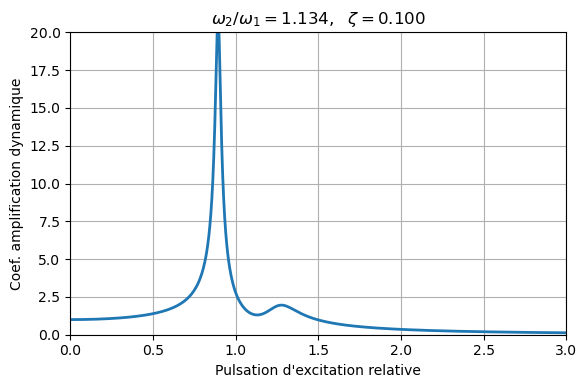

In [6]:
allw = np.linspace(0.0,3.0*w1,1000)
allbeta1 = np.block([beta1AN(w) for w in allw]).T

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25)
ax.plot(allw/w1, allbeta1, lw=2)
ax.grid(True)
ax.set_xlim(allw.min()/w1,allw.max()/w1)
ax.set_ylim(0,20)
ax.set_xlabel("Pulsation d'excitation relative")
ax.set_ylabel("Coef. amplification dynamique")
ax.set_title('$\\omega_2/\\omega_1 = %.3f,~~\\zeta = %.3f$'%(w2/w1, zeta))

plt.show()

## Optimisation

Il s'agit désormais de modifier les deux paramètres du problème, la longueur du pendule $L_2$ et le taux d'amortissement $\zeta$, pour réduire au maximum les amplifications dynamiques.

Il est possible de faire plusieurs calculs, de manière successive, pour identifier les paramètres optimaux. Après plusieurs itérations, des paramètres optimaux semblent proches :
$$
L_2^* \approx 16\,\mathrm{cm},
\quad
\zeta^* \approx 0.2.
$$

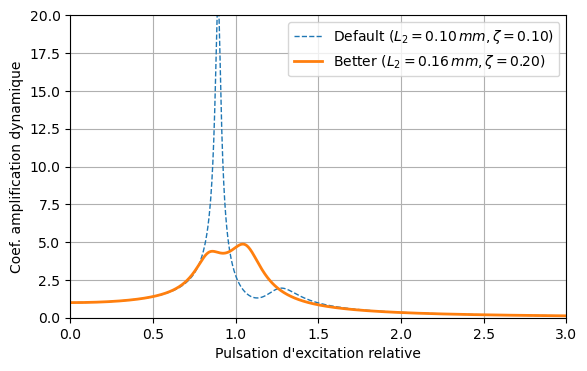

In [12]:
L2opt = 0.16 # [m] Optimal length of the pendulum
k2opt = m2*g/L2opt # [N/m] Equivalent stiffness of the pendulum 
zetaopt = 0.2 # Optimal damping ratio
c2opt = 2*zetaopt*np.sqrt(m2*k2opt) # Optimal damping coefficient
w2opt = np.sqrt(k2opt/m2)
def beta1OPT(w:float):
    '''Resolution analytique'''
    D11 = -w**2*m1 + 1j*w*c2opt + k1+k2opt
    D12 = -1j*w*c2opt - k2opt
    D22 = -w**2*m2 + 1j*w*c2opt + k2opt
    return np.absolute(k1*D22/(D11*D22 - D12**2))

allbeta1opt = np.block([beta1OPT(w) for w in allw]).T

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25)
ax.plot(allw/w1, allbeta1, lw=1, linestyle="dashed", label="Default $(L_2={0:.2f}\, mm, \\zeta = {1:.2f})$".format(L2, zeta))
ax.plot(allw/w1, allbeta1opt, lw=2, linestyle="solid", label="Better $(L_2={0:.2f}\, mm, \\zeta = {1:.2f})$".format(L2opt, zetaopt))
ax.grid(True)
ax.legend()
ax.set_xlim(allw.min()/w1,allw.max()/w1)
ax.set_ylim(0,20)
ax.set_xlabel("Pulsation d'excitation relative")
ax.set_ylabel("Coef. amplification dynamique")
# ax.set_title('$\\omega_2/\\omega_1 = %.3f,~~\\zeta = %.2f$'%(w2opt/w1, zetaopt))

plt.show()

### Digression

Les paramètres optimaux peuvent être obtenu à partir de la formulation et la résolution d'un problème d'[optimisation mathématique](https://fr.wikipedia.org/wiki/Optimisation_(math%C3%A9matiques)). Des algorithmes d'optimisation permettent de résoudre de tels problèmes (généralement non-linéaires). Avec une telle approche, il est possible d'identifier de manière plus précise les paramètres optimaux. Nous obtenons :
$$
L_2^* \approx 15.6\,\mathrm{cm},
\quad
\zeta^* \approx 0.185.
$$

Optimal length : 0.156 mm
Optimal ratio  : 0.185


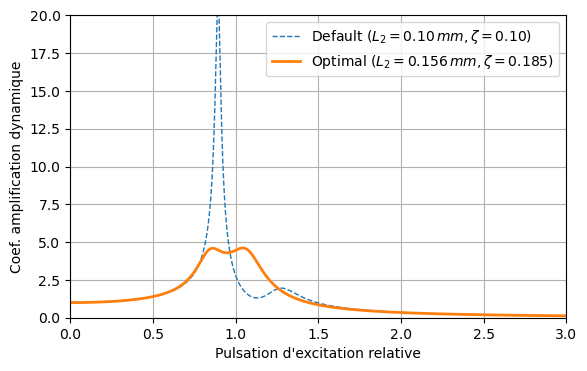

In [11]:
def fobj(x):
    '''Fonction objective à minimiser'''
    L,zeta = x.tolist()
    k2 = m2*g/L
    c2 = 2*zeta*np.sqrt(k2*m2)

    allBeta1 = []
    for w in allw:
        D11 = -w**2*m1 + 1j*w*c2 + k1+k2
        D12 = -1j*w*c2 - k2
        D22 = -w**2*m2 + 1j*w*c2 + k2
        allBeta1.append(np.absolute(k1*D22/(D11*D22 - D12**2)))
    return np.amax(allBeta1)

import scipy.optimize as opt

res = opt.minimize(fobj, np.array([0.1, 0.1]), bounds=opt.Bounds(lb=np.array([0.01,0.001]), ub=np.array([1,1])), method="SLSQP")

L2optNum,zetaoptNum = res.x

# Plot
k2optNum = m2*g/L2optNum
c2optNum = 2*zetaopt*np.sqrt(m2*k2optNum)
w2optNum = np.sqrt(k2optNum/m2)
def beta1OPTnum(w:float):
    '''Resolution analytique'''
    D11 = -w**2*m1 + 1j*w*c2optNum + k1+k2optNum
    D12 = -1j*w*c2opt - k2optNum
    D22 = -w**2*m2 + 1j*w*c2optNum + k2optNum
    return np.absolute(k1*D22/(D11*D22 - D12**2))

allbeta1optNum = np.block([beta1OPTnum(w) for w in allw]).T

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.25)
ax.plot(allw/w1, allbeta1, lw=1, linestyle="dashed", label="Default $(L_2={0:.2f}\, mm, \\zeta = {1:.2f})$".format(L2, zeta))
ax.plot(allw/w1, allbeta1optNum, lw=2, linestyle="solid", label="Optimal $(L_2={0:.3f}\, mm, \\zeta = {1:.3f})$".format(L2optNum, zetaoptNum))
ax.grid(True)
ax.legend()
ax.set_xlim(allw.min()/w1,allw.max()/w1)
ax.set_ylim(0,20)
ax.set_xlabel("Pulsation d'excitation relative")
ax.set_ylabel("Coef. amplification dynamique")


print("Optimal length : {0:.3f} mm".format(L2optNum))
print("Optimal ratio  : {0:.3f}".format(zetaoptNum))
